In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels = [
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.8,
    0.9,
    1,
    1.1,
    1.2,
    1.3,
    1.4,
    1.5,
    1.6,
    1.7,
    1.8,
    1.9,
    2,
    2.1,
    2.2,
    2.3,
    2.4,
    2.5,
    2.6,
    2.7,
    2.8,
    2.9,
    3,
]
df = []
masses = []

for label in labels:
    masses += [label]
    df += [pd.read_csv(f"{label}.data", sep="\s+")]
masses = np.array(masses)

In [10]:
print(masses.T.shape)

(30,)


In [11]:
error=[]
for pred in labels:

    df1=df
    masses1=masses
    for label in labels:
        if label!=pred:
            df2=[]
            masses2=[]
            for i,_ in enumerate(labels):
                    df2 += [df[i]]
                    masses2 += [masses[i]]


    ages = []
    lums = []
    ages1 = []
    lums1 = []

    for d in df2:
        condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
        if condition.any():
            start_h_burning = d.loc[condition, "star_age"].iloc[0]
        else:
            start_h_burning = None

        condition = d["center_h1"] < 1e-6
        if condition.any():
            end_h_burning = d.loc[condition, "star_age"].iloc[0]
        else:
            end_h_burning = None

        d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

        ages += [d["star_age"]]
        lums += [d["log_Lneu"]]

    for d in df1:
        condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
        if condition.any():
            start_h_burning = d.loc[condition, "star_age"].iloc[0]
        else:
            start_h_burning = None

        condition = d["center_h1"] < 1e-6
        if condition.any():
            end_h_burning = d.loc[condition, "star_age"].iloc[0]
        else:
            end_h_burning = None

        d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

        ages1 += [d["star_age"]]
        lums1 += [d["log_Lneu"]]

    min_length = min(len(lum) for lum in lums)
    ages = np.log([age[:min_length] for age in ages])
    lums = np.array([lum[:min_length] for lum in lums])

    min_length = min(len(lum) for lum in lums1)
    ages1 = np.log([age[:min_length] for age in ages1])
    lums1 = np.array([lum[:min_length] for lum in lums1])

    from sklearn.linear_model import LinearRegression as LnR

    output = np.array(
        [
            *(i for z in zip(ages.T, lums.T) for i in z),
        ]
    ).T
    # print(masses.shape)
    # print(ages.shape)
    # print(output.shape)
    model = LnR()
    model.fit(np.array([masses]).T, output)

    prediction = model.predict([[pred]])
    predicted_ages = prediction[:, ::2]
    predicted_lums = prediction[:, 1::2]

    e=np.sqrt((predicted_ages.T[:,0]-ages1[[*labels].index(pred)])**2+(predicted_lums.T[:,0]-lums1[[*labels].index(pred)])**2)
    # print(e)
    se=0
    for es in e:
        se+=es
    error+=[se]


In [12]:
print(error)

[2792.670064058373, 2230.4205845834813, 845.8930083838887, 687.8223668700125, 471.89467560583745, 246.91273438014207, 212.07107251886592, 212.07107251886592, 365.68257291327416, 462.54999261820484, 508.3393134041623, 684.2634582613845, 858.6730620904125, 1040.4992464538077, 1567.7586687283983, 2504.0822591923356, 2503.931198991685, 2141.5261330096237, 1812.1672821057305, 1221.5507325669455, 1051.459013095274, 730.6217658542478, 681.3210936453362, 728.1305316179763, 958.471548170236, 1204.4422951588097, 1405.2436262547617, 1602.1122628919281, 1833.6066969477486, 1954.4872423146917]


(0.0, 2500.0)

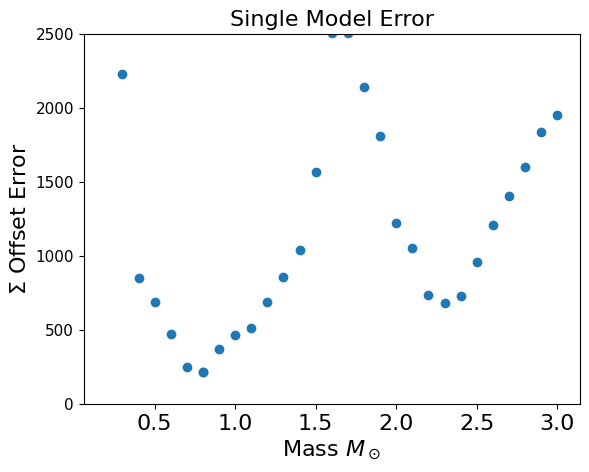

In [ ]:
plt.scatter(masses,error)
plt.xlabel(r"Mass $M_\odot$",fontsize=16)
plt.ylabel(r'$\Sigma$ Offset Error',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=11)
plt.title('Single Model Error',fontsize=16)
# plt.ylim(0,2500)